# Notebook para revisión del conjunto de datos

Esta libreta busca servir como punto de partida para el desarrollo de los ejemplos planteados en el taller.
Se va a comenzar por explorar los datos disponibles, verifica relaciones entre tablas y preparar algunas cuestiones para los pasos siguientes de la experimentación.

Algunos detalles:

- Fuente de datos: directorio `data/`
- Objetivos:
  - Explorar y perfilar datasets
  - Verificar integridad referencial
  - Validar reglas de negocio de totales

## Configuración general e importaciones de librerías a utilizar

In [1]:
# Sección 1: Configuración e importaciones
import json
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Opciones de display
# pd.set_option("display.max_columns", 100)
# pd.set_option("display.width", 160)
sns.set_theme(style="whitegrid")

# Paths
PROJECT_DIR = Path("..").resolve()
DATA_DIR = PROJECT_DIR / "data"
OUTPUTS_DIR = PROJECT_DIR / "outputs"
OUTPUTS_DIR.mkdir(exist_ok=True)

print(f"Proyecto: {PROJECT_DIR}")
print(f"Datos: {DATA_DIR}")
print(f"Outputs: {OUTPUTS_DIR}")

Proyecto: /home/rey/code/exa/jcsa/taller-2025
Datos: /home/rey/code/exa/jcsa/taller-2025/data
Outputs: /home/rey/code/exa/jcsa/taller-2025/outputs


## Carga de los datos utilizando Pandas

In [2]:
# Sección 2: Cargar CSVs (users, products, orders, order_items, reviews)

users = pd.read_csv(DATA_DIR / "users.csv", dtype={"user_id": "string"})
products = pd.read_csv(DATA_DIR / "products.csv", dtype={"product_id": "string"})
orders = pd.read_csv(
    DATA_DIR / "orders.csv",
    dtype={"order_id": "string", "user_id": "string"},
    parse_dates=["order_datetime"],
)
order_items = pd.read_csv(
    DATA_DIR / "order_items.csv", 
    dtype={"order_id": "string", "product_id": "string", "user_id": "string"}
)
reviews = pd.read_csv(
    DATA_DIR / "reviews.csv",
    dtype={"review_id": "string", "order_id": "string", "product_id": "string", "user_id": "string"},
    parse_dates=["review_date"],
)

datos = {
    "users": users,
    "products": products,
    "orders": orders,
    "order_items": order_items,
    "reviews": reviews,
}

for nombre, df in datos.items():
    print(f"Dimensiones de {nombre}:")
    print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")
    print("-"*40)

Dimensiones de users:
Filas: 1000 - Columnas: 11
----------------------------------------
Dimensiones de products:
Filas: 500 - Columnas: 11
----------------------------------------
Dimensiones de orders:
Filas: 8000 - Columnas: 13
----------------------------------------
Dimensiones de order_items:
Filas: 16798 - Columnas: 7
----------------------------------------
Dimensiones de reviews:
Filas: 3000 - Columnas: 7
----------------------------------------


## Vista rápida de metadatos por dataset

In [3]:
# Sección 3: Perfilado básico por dataset

def perfil_basico(nombre, df, id_col=None):
    print(f"\n== {nombre} ==")
    display(df.head(3))
    print("\nInfo:")
    display(df.info())
    print("\nDescribe (columnas numéricas):")
    display(df.select_dtypes(include=["number"]).describe())
    print("\nNulos por columna:")
    display(df.isna().sum().sort_values(ascending=False))
    if id_col and id_col in df.columns:
        dups = df.duplicated(subset=[id_col]).sum()
        print(f"Duplicados en {id_col}: {dups}")
    print("\n" + "="*50)

perfil_basico("users", users, id_col="user_id")
perfil_basico("products", products, id_col="product_id")
perfil_basico("orders", orders, id_col="order_id")
perfil_basico("order_items", order_items)
perfil_basico("reviews", reviews)


== users ==


,user_id,first_name,last_name,email,signup_date,country,city,postal_code,age,gender,loyalty_tier
0,U000001,Angel,Hill,donaldgarcia@example.net,2025-03-13,Uganda,New Roberttown,12781,30,Male,Silver
1,U000002,William,Johnson,jennifermiles@example.com,2024-05-29,Cyprus,Lawrencetown,21427,47,Female,NaN
2,U000003,Matthew,Moore,curtis61@example.com,2025-04-22,Tanzania,Cassandraton,96148,29,Male,Silver



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1000 non-null   string
 1   first_name    1000 non-null   object
 2   last_name     1000 non-null   object
 3   email         1000 non-null   object
 4   signup_date   1000 non-null   object
 5   country       1000 non-null   object
 6   city          1000 non-null   object
 7   postal_code   1000 non-null   int64 
 8   age           1000 non-null   int64 
 9   gender        1000 non-null   object
 10  loyalty_tier  513 non-null    object
dtypes: int64(2), object(8), string(1)
memory usage: 86.1+ KB


None


Describe (columnas numéricas):


,postal_code,age
count,1000.000000,1000.000000
mean,51794.644000,48.688000
std,28695.611865,18.382235
min,595.000000,16.000000
25%,25552.750000,33.000000
50%,52216.500000,48.000000
75%,77944.750000,65.000000
max,99651.000000,80.000000



Nulos por columna:


loyalty_tier    487
first_name        0
user_id           0
last_name         0
email             0
country           0
signup_date       0
city              0
postal_code       0
age               0
gender            0
dtype: int64

Duplicados en user_id: 0


== products ==


,product_id,title,brand,category,price,currency,weight_g,rating_avg,num_ratings,inventory,created_at
0,P000001,NeoTech Name Pet,NeoTech,Pet Supplies,201.32,USD,399,2.89,123,67,2023-01-15
1,P000002,Everest Red Clothing,Everest,Clothing,209.86,USD,1318,2.63,132,63,2024-02-27
2,P000003,Nimbus Third Books,Nimbus,Books,35.90,USD,137,3.68,121,19,2024-12-01



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   500 non-null    string 
 1   title        500 non-null    object 
 2   brand        500 non-null    object 
 3   category     500 non-null    object 
 4   price        500 non-null    float64
 5   currency     500 non-null    object 
 6   weight_g     500 non-null    int64  
 7   rating_avg   500 non-null    float64
 8   num_ratings  500 non-null    int64  
 9   inventory    500 non-null    int64  
 10  created_at   500 non-null    object 
dtypes: float64(2), int64(3), object(5), string(1)
memory usage: 43.1+ KB


None


Describe (columnas numéricas):


,price,weight_g,rating_avg,num_ratings,inventory
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,164.693800,765.946000,3.736000,120.224000,48.296000
std,213.970916,564.661304,0.681027,11.216838,45.405326
min,0.780000,11.000000,2.500000,84.000000,1.000000
25%,37.112500,308.000000,3.150000,113.000000,14.000000
50%,84.870000,665.000000,3.775000,121.000000,34.000000
75%,196.955000,1111.750000,4.315000,128.000000,70.000000
max,1348.600000,3020.000000,4.890000,152.000000,249.000000



Nulos por columna:


product_id     0
title          0
brand          0
category       0
price          0
currency       0
weight_g       0
rating_avg     0
num_ratings    0
inventory      0
created_at     0
dtype: int64

Duplicados en product_id: 0


== orders ==


,order_id,user_id,order_datetime,num_items,subtotal,shipping_fee,tax,discount_total,total,payment_method,order_status,shipping_city,shipping_country
0,O00000001,U000035,2024-04-05 22:40:16.570883,4,1172.97,0.0,130.87,23.37,1303.84,Paypal,returned,Lake Rachelhaven,Panama
1,O00000002,U000050,2025-03-15 07:00:56.617123,1,122.90,0.0,12.99,0.00,135.89,Gift Card,cancelled,Port Loriport,San Marino
2,O00000003,U000756,2024-10-19 07:03:52.310462,1,298.53,0.0,15.61,142.25,314.14,Credit Card,cancelled,Heatherborough,Finland



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          8000 non-null   string        
 1   user_id           8000 non-null   string        
 2   order_datetime    8000 non-null   datetime64[ns]
 3   num_items         8000 non-null   int64         
 4   subtotal          8000 non-null   float64       
 5   shipping_fee      8000 non-null   float64       
 6   tax               8000 non-null   float64       
 7   discount_total    8000 non-null   float64       
 8   total             8000 non-null   float64       
 9   payment_method    8000 non-null   object        
 10  order_status      8000 non-null   object        
 11  shipping_city     8000 non-null   object        
 12  shipping_country  8000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4), string(2)
memory

None


Describe (columnas numéricas):


,num_items,subtotal,shipping_fee,tax,discount_total,total
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2.099750,416.392273,2.090426,35.385536,10.544551,453.868235
std,1.312542,501.396402,3.662062,43.872031,40.175816,541.860986
min,1.000000,0.530000,0.000000,0.030000,0.000000,6.130000
25%,1.000000,91.370000,0.000000,7.350000,0.000000,106.352500
50%,2.000000,241.570000,0.000000,19.725000,0.000000,262.050000
75%,3.000000,561.165000,4.130000,46.587500,0.000000,604.650000
max,6.000000,6065.190000,12.000000,593.240000,960.490000,6658.430000



Nulos por columna:


order_id            0
user_id             0
order_datetime      0
num_items           0
subtotal            0
shipping_fee        0
tax                 0
discount_total      0
total               0
payment_method      0
order_status        0
shipping_city       0
shipping_country    0
dtype: int64

Duplicados en order_id: 0


== order_items ==


,order_id,product_id,user_id,quantity,unit_price,discount,item_total
0,O00000001,P000395,U000035,2,141.18,0.00,282.36
1,O00000001,P000433,U000035,1,143.94,23.37,120.57
2,O00000001,P000235,U000035,1,13.81,0.00,13.81



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    16798 non-null  string 
 1   product_id  16798 non-null  string 
 2   user_id     16798 non-null  string 
 3   quantity    16798 non-null  int64  
 4   unit_price  16798 non-null  float64
 5   discount    16798 non-null  float64
 6   item_total  16798 non-null  float64
dtypes: float64(3), int64(1), string(3)
memory usage: 918.8 KB


None


Describe (columnas numéricas):


,quantity,unit_price,discount,item_total
count,16798.000000,16798.000000,16798.000000,16798.000000
mean,1.244612,162.151829,5.021813,198.305642
std,0.516091,206.673221,27.599724,290.680980
min,1.000000,0.780000,0.000000,0.530000
25%,1.000000,37.290000,0.000000,41.335000
50%,1.000000,86.230000,0.000000,98.250000
75%,1.000000,195.500000,0.000000,228.010000
max,3.000000,1348.600000,960.490000,4045.800000



Nulos por columna:


order_id      0
product_id    0
user_id       0
quantity      0
unit_price    0
discount      0
item_total    0
dtype: int64



== reviews ==


,review_id,order_id,product_id,user_id,rating,review_text,review_date
0,R00005420,O00002609,P000050,U000062,4,Fast shipping and good packaging.,2024-02-22 09:16:30.591399
1,R00002330,O00001109,P000449,U000201,3,Customer service was helpful.,2025-09-25 19:01:46.645299
2,R00001262,O00000598,P000051,U000525,4,"Excellent product, will buy again.",2025-08-24 10:56:04.093246



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    3000 non-null   string        
 1   order_id     3000 non-null   string        
 2   product_id   3000 non-null   string        
 3   user_id      3000 non-null   string        
 4   rating       3000 non-null   int64         
 5   review_text  3000 non-null   object        
 6   review_date  3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1), string(4)
memory usage: 164.2+ KB


None


Describe (columnas numéricas):


,rating
count,3000.000000
mean,3.555667
std,0.975304
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000



Nulos por columna:


review_id      0
order_id       0
product_id     0
user_id        0
rating         0
review_text    0
review_date    0
dtype: int64

----

[Vista del diagrama de los datasets y sus relaciones](https://www.mermaidchart.com/d/d0336fce-feaf-4cb9-abe9-bd6102fedcf9)

----

## Algunos gráficos de los atributos categóricos

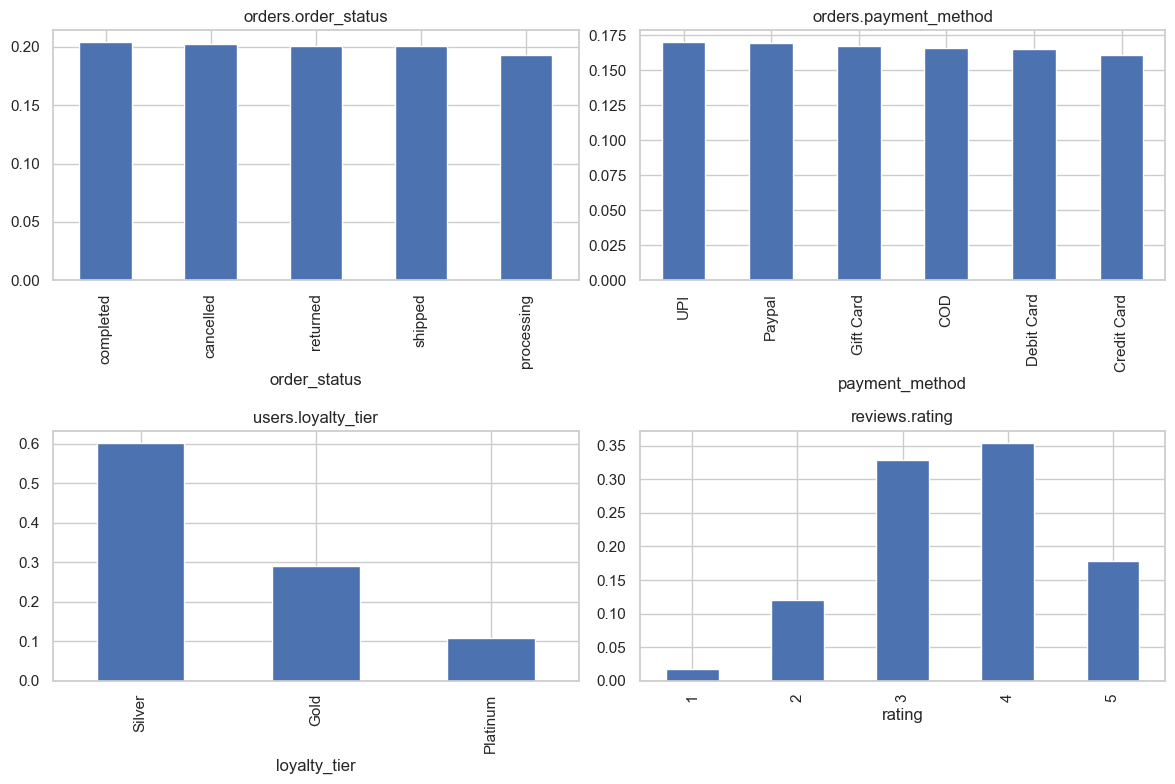

In [4]:
# Sección 4: Distribuciones categóricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

orders["order_status"].value_counts(normalize=True).plot(kind="bar", ax=axes[0,0], title="orders.order_status")
orders["payment_method"].value_counts(normalize=True).plot(kind="bar", ax=axes[0,1], title="orders.payment_method")
users["loyalty_tier"].value_counts(normalize=True).plot(kind="bar", ax=axes[1,0], title="users.loyalty_tier")
reviews["rating"].value_counts(normalize=True).sort_index().plot(kind="bar", ax=axes[1,1], title="reviews.rating")
plt.tight_layout()
plt.show()

## Revisión de integridad referencial

In [5]:
# Sección 5: Chequeos de relaciones (integridad referencial)
# order_items -> orders
oi_orders = order_items.merge(orders[["order_id"]], on="order_id", how="left", indicator=True)
orphan_oi_orders = oi_orders[oi_orders["_merge"] == "left_only"]

# order_items -> products
oi_products = order_items.merge(products[["product_id"]], on="product_id", how="left", indicator=True)
orphan_oi_products = oi_products[oi_products["_merge"] == "left_only"]

# orders -> users
orders_users = orders.merge(users[["user_id"]], on="user_id", how="left", indicator=True)
orphan_orders_users = orders_users[orders_users["_merge"] == "left_only"]

rel_summary = {
    "order_items without orders": len(orphan_oi_orders),
    "order_items without products": len(orphan_oi_products),
    "orders without users": len(orphan_orders_users),
}
print("Orphans summary:")
print(rel_summary)

# Visualización (si existen)
if len(orphan_oi_orders) > 0:
    display(orphan_oi_orders.head(5))
if len(orphan_oi_products) > 0:
    display(orphan_oi_products.head(5))
if len(orphan_orders_users) > 0:
    display(orphan_orders_users.head(5))

Orphans summary:
{'order_items without orders': 0, 'order_items without products': 0, 'orders without users': 0}


## Revisión de reglas de negocio

Se considera que el total de una orden debería ser la suma del `subtotal + envío + impuestos - descuentos`

In [6]:
# Sección 6: Regla de negocio de totales
orders = orders.copy()
orders["computed_total"] = (orders["subtotal"] + orders["shipping_fee"] + orders["tax"] - orders["discount_total"]).round(2)
orders["total_rounded"] = orders["total"].round(2)
orders["difference"] = (orders["computed_total"] - orders["total_rounded"]).round(2)

mismatch = orders[orders["difference"] != 0]

print(f"Filas con discrepancia de total: {len(mismatch)} / {len(orders)} ({100*len(mismatch)/len(orders):.2f}%)")
if not mismatch.empty:
    display(mismatch[["order_id", "subtotal", "shipping_fee", "tax", "discount_total", "total", "computed_total", "difference"]].head(10))

Filas con discrepancia de total: 1830 / 8000 (22.88%)


,order_id,subtotal,shipping_fee,tax,discount_total,total,computed_total,difference
0,O00000001,1172.97,0.00,130.87,23.37,1303.84,1280.47,-23.37
2,O00000003,298.53,0.00,15.61,142.25,314.14,171.89,-142.25
8,O00000009,449.79,0.00,38.37,108.39,488.16,379.77,-108.39
10,O00000011,1153.53,0.00,101.58,66.74,1255.11,1188.37,-66.74
17,O00000018,98.15,7.02,8.25,39.83,113.42,73.59,-39.83
19,O00000020,265.11,0.00,23.78,8.24,288.89,280.65,-8.24
20,O00000021,259.45,0.00,13.06,1.21,272.51,271.30,-1.21
21,O00000022,819.42,0.00,70.32,37.12,889.74,852.62,-37.12
39,O00000040,480.29,0.00,44.23,104.98,524.52,419.54,-104.98
42,O00000043,229.28,0.00,18.13,46.41,247.41,201.00,-46.41
